In [1]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
df_trans = pd.read_excel('KPMG.xlsx', sheet_name='Transactions')
print(df_trans.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [3]:
# in ra info bảng
print(df_trans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# describe default
df_trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
# describe các biến object
df_trans.describe(include='object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [6]:
#describe all
df_trans.describe(include='all', datetime_is_numeric=True)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,42710.000000


In [7]:
# count số dòng bị null ở mỗi cột
df_trans.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = df_trans.dropna()
print(df_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = df_trans.dropna(subset=['online_order'])
print(df_dropna_online_order.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = df_trans.fillna(0)
print(df_fillna_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = df_trans.ffill()
print(df_fillna_ffill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = df_trans.bfill()
print(df_fillna_bfill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorial Data

In [13]:
# load sheet Demographic và hiển thị top head
df_demo = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')
print(df_demo.head(n=1))

   customer_id first_name  last_name gender  \
0            1    Laraine  Medendorp      F   

   past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   

  job_industry_category wealth_segment deceased_indicator default owns_car  \
0                Health  Mass Customer                  N      "'      Yes   

   tenure  
0    11.0  


C:\Users\tramy\AppData\Local\Temp\ipykernel_9612\1904575293.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_demo = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')


In [14]:
# in ra info bảng
print(df_demo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [15]:
# describe các giá trị object
df_demo.describe(include='object')

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [16]:
# Remove all NA row
df_demo = df_demo.dropna()

In [17]:
# In ra các giá trị unique của cột gender
print(df_demo['gender'].unique())

['F' 'Male' 'Female' 'Femal']


In [18]:
# Quy chuẩn cột Gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
df_demo['gender'] = df_demo['gender'].replace(['F', 'Femal'], 'Female')
df_demo['gender'] = df_demo['gender'].replace('M', 'Male')
df_demo['gender'] = df_demo['gender'].replace('U', 'Unisex')
print(df_demo['gender'].unique())

['Female' 'Male']


In [19]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "Age" và in ra min age, max age
df_demo['Age'] = int(dt.datetime.today().strftime("%Y")) - df_demo["DOB"].dt.strftime("%Y").astype(int)
print("Min age:",df_demo['Age'].min())
print("Max age:",df_demo['Age'].max())

Min age: 20
Max age: 91


In [20]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 36 - 55 là "Middle", trên 55 là Older
# lưu vào cột "Age_Group" bằng cách sử dụng hàm cut
def group_people_by_age(df):
    df["Age_Group"] = pd.cut(x=df['Age'], bins=[0,35,55,100], labels=["Young","Middle","Older"])
    return df
df_demo = group_people_by_age(df_demo)

# 2. Data Completeness

In [21]:
#join data sale vs demographic và in ra những trường hợp missing trong demographic
in_trans_missing_in_demo = df_trans.merge(df_demo, how='left', on='customer_id', indicator='i'
                                         ).query('i=="left_only"')
print(in_trans_missing_in_demo)

       transaction_id  product_id  customer_id transaction_date  online_order  \
4                   5          78          787       2017-10-01           1.0   
7                   8          15         2459       2017-07-15           0.0   
10                 11           5         1986       2017-01-17           0.0   
16                 17          79         2426       2017-04-03           0.0   
24                 25          89         2822       2017-06-11           0.0   
...               ...         ...          ...              ...           ...   
19988           19989           0          714       2017-04-27           1.0   
19991           19992          11         1374       2017-09-14           0.0   
19992           19993          13            5       2017-04-28           0.0   
19993           19994          77         2618       2017-12-23           0.0   
19998           19999           6         2764       2017-07-03           0.0   

      order_status         

# 3. Data Aggregation

In [22]:
# tính tổng khách hàng bằng hàm nunique
total_distinct_customer = df_demo['customer_id'].nunique()

In [23]:
# Tính số khách khách hàng mỗi tháng
# hint 1: tạo collum year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
df_trans['transaction_date'] = pd.to_datetime(df_trans['transaction_date'])
df_trans['year_month'] = df_trans['transaction_date'].dt.strftime('%m-%Y')
total_customers_per_month = df_trans['customer_id'].groupby(df_trans['year_month']).nunique()
print(total_customers_per_month)

year_month
01-2017    1354
02-2017    1286
03-2017    1317
04-2017    1310
05-2017    1310
06-2017    1266
07-2017    1354
08-2017    1372
09-2017    1263
10-2017    1414
11-2017    1319
12-2017    1322
Name: customer_id, dtype: int64


In [24]:
# Tính Gross magin của mỗi tháng. Gross magin = list_price - standard_cost
# hint 1: tạo collum Gross_Margin
# hint 2: group by year_month và sử dụng hàm agg
df_trans['Gross_Margin'] = df_trans['list_price'] - df_trans['standard_cost']
gross_margin_per_month = df_trans['Gross_Margin'].groupby(df_trans['year_month']).agg('sum')
print(gross_margin_per_month)

year_month
01-2017    929487.739988
02-2017    870819.060000
03-2017    879243.400000
04-2017    904691.310000
05-2017    913742.610000
06-2017    859571.550000
07-2017    938619.290000
08-2017    970452.520000
09-2017    862290.490000
10-2017    984973.464984
11-2017    924938.460000
12-2017    891454.070000
Name: Gross_Margin, dtype: float64


In [25]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
total_order_by_online_order_n_order_status = df_trans['transaction_id'].groupby([df_trans['online_order'], df_trans['order_status']]).agg('count')
revenue_by_online_order_n_order_status = df_trans['list_price'].groupby([df_trans['online_order'], df_trans['order_status']]).agg('sum')

# 4. Data Visualization

In [26]:
# Sử dụng seaborn và vẽ ra 5 loại chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Brand')

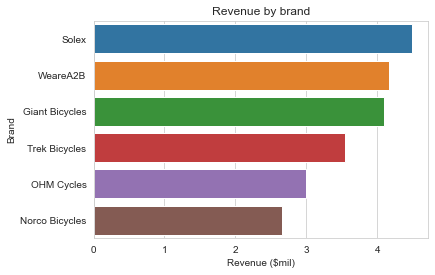

In [27]:
#Revenue by brand
revenue_by_brand = (df_trans['list_price']/10**6).groupby(df_trans['brand']).sum().reset_index(name='revenue').sort_values(by=['revenue'], ascending=False)
sns.set_style('whitegrid')
sns.barplot(x='revenue', y='brand', data=revenue_by_brand)
plt.title('Revenue by brand')
plt.xlabel('Revenue ($mil)')
plt.ylabel('Brand')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

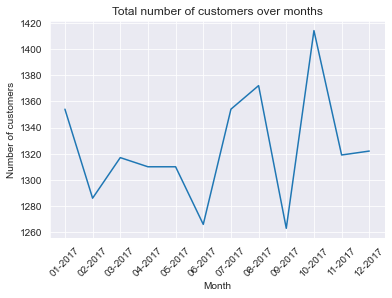

In [28]:
#total number of customer over months
total_customers_over_months = total_customers_per_month.reset_index(name='num_customers')
sns.set_style('darkgrid')
sns.lineplot(x='year_month', y='num_customers', data=total_customers_over_months)
plt.title('Total number of customers over months')
plt.xlabel('Month')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)

Text(0, 0.5, "Revenue ($'000)")

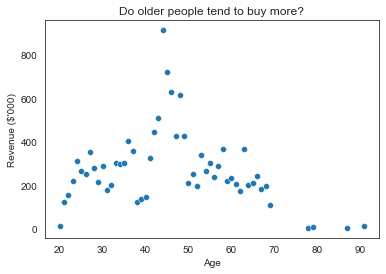

In [42]:
#Revenue by age - Do older people tend to buy more?
trans_demo = df_trans.merge(df_demo, how='left', on='customer_id')
revenue_by_age = (trans_demo['list_price']/10**3).groupby(trans_demo['Age']).sum().reset_index(name='rev_per_age')
sns.set_style("white")
sns.scatterplot(x="Age", y="rev_per_age", data=revenue_by_age)
plt.title('Do older people tend to buy more?')
plt.xlabel('Age')
plt.ylabel("Revenue ($'000)")

Text(28.43333333333333, 0.5, 'Revenue ($mil)')

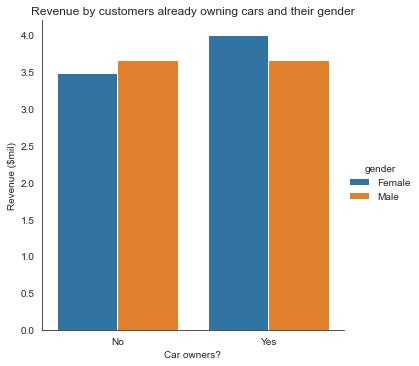

In [41]:
#Revenue by customers already owning cars and their gender
rev_by_car_owners_n_gender = (trans_demo['list_price']/10**6).groupby([trans_demo['owns_car'], trans_demo['gender']]).sum().reset_index(name='rev')
sns.set_style("white")
sns.catplot(x="owns_car", y="rev", hue='gender', data=rev_by_car_owners_n_gender, kind='bar')
plt.title('Revenue by customers already owning cars and their gender')
plt.xlabel('Car owners?')
plt.ylabel("Revenue ($mil)")

Text(0, 0.5, 'Revenue per customer')

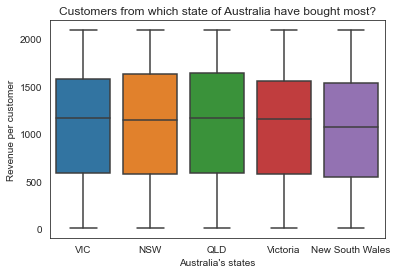

In [66]:
#Customers from which state of Australia have bought most?
df_add = pd.read_excel('KPMG.xlsx', sheet_name='CustomerAddress')
trans_add = df_trans.merge(df_add, how='left', on='customer_id')
sns.set_style("white")
sns.boxplot(x="state", y="list_price", data=trans_add)
plt.title('Customers from which state of Australia have bought most?')
plt.xlabel("Australia's states")
plt.ylabel("Revenue per customer")